# Baselines and Formulation


## Data Preparation

In [1]:
import json
import zipfile
import os
import pandas as pd
import numpy as np

In [1]:
# Install and start postgresql-11 server
!sudo apt-get -y -qq update
!wget --quiet -O - https://www.postgresql.org/media/keys/ACCC4CF8.asc | sudo apt-key add -
!echo "deb http://apt.postgresql.org/pub/repos/apt/ `lsb_release -cs`-pgdg main" |sudo tee  /etc/apt/sources.list.d/pgdg.list
!sudo apt-get -y -qq update
!sudo apt-get -y -qq install postgresql-11 postgresql-client-11
!sudo service postgresql start

# Setup a password `postgres` for username `postgres`
!sudo -u postgres psql -U postgres -c "ALTER USER postgres PASSWORD 'postgres';"

# Setup a database with name `donors_choose` to be used
!sudo -u postgres psql -U postgres -c 'DROP DATABASE IF EXISTS donors_choose;'

!sudo -u postgres psql -U postgres -c 'CREATE DATABASE donors_choose;'

# Environment variables for connecting to the database
%env DEMO_DATABASE_NAME=donors_choose
%env DEMO_DATABASE_HOST=localhost
%env DEMO_DATABASE_PORT=5432

# Setup a database with name `donors_choose` to be used
!sudo -u postgres psql -U postgres -c 'DROP DATABASE IF EXISTS donors_choose;'

!sudo -u postgres psql -U postgres -c 'CREATE DATABASE donors_choose;'

# Environment variables for connecting to the database
%env DEMO_DATABASE_NAME=donors_choose
%env DEMO_DATABASE_HOST=localhost
%env DEMO_DATABASE_PORT=5432
%env DEMO_DATABASE_USER=postgres
%env DEMO_DATABASE_PASS=postgres

OK
deb http://apt.postgresql.org/pub/repos/apt/ focal-pgdg main
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 13.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package cron.
(Reading database ... 128126 files and directories currently installed.)
Preparing to unpack .../00-cron_3.0pl1-136ubuntu1_amd64.deb ...
Unpacking cron (3.0pl1-136ubuntu1) ...
Selecting previously unselected package libjson-perl.
Preparing to unpack .../01-libjson-perl_4.02000-2_all.deb ...
Unpacking libjson-perl (4.02000-2) ...
Selecting previously unselected package netbase.
Preparing to unpack .../02-netbase_6.1_all.deb ...
Unpacking

In [4]:
# Download sampled DonorsChoose data and load it into our postgres server
!curl -s -OL https://dsapp-public-data-migrated.s3.us-west-2.amazonaws.com/donors_sampled_20210920_v3.dmp
!PGPASSWORD=$DEMO_DATABASE_PASS pg_restore -h $DEMO_DATABASE_HOST -p $DEMO_DATABASE_PORT -d $DEMO_DATABASE_NAME -U $DEMO_DATABASE_USER -O -j 8 donors_sampled_20210920_v3.dmp
!pip install SQLAlchemy==1.3.18 PyYAML==6.0 psycopg2-binary==2.9.3
from sqlalchemy.engine.url import URL
from sqlalchemy import create_engine

db_url = URL(
            'postgres',
            host='localhost',
            username='postgres',
            database='donors_choose',
            password='postgres',
            port=5432,
        )

db_engine = create_engine(db_url)
full_projects = pd.read_sql("SELECT * FROM data.projects", db_engine)
full_resources = pd.read_sql("SELECT * FROM data.resources", db_engine)
full_donations = pd.read_sql("SELECT * FROM data.donations", db_engine)


pg_restore: [archiver (db)] Error while PROCESSING TOC:
pg_restore: [archiver (db)] Error from TOC entry 5; 2615 8563827 SCHEMA data dssg_admin
pg_restore: [archiver (db)] could not execute query: ERROR:  schema "data" already exists
    Command was: CREATE SCHEMA data;



pg_restore: [archiver (db)] Error from TOC entry 197; 1259 8563828 TABLE donations dssg_admin
pg_restore: [archiver (db)] could not execute query: ERROR:  relation "donations" already exists
    Command was: CREATE TABLE data.donations (
    donationid character varying(50),
    projectid_str character varying(50),
    donor_acctid character varying(50),
    donor_city character varying(50),
    donor_state character varying(10),
    donor_zip character varying(10),
    is_teacher_acct boolean,
    donation_timestamp timestamp without time zone,
    donation_to_project numeric,
    donation_optional_support numeric,
    donation_total numeric,
    dollar_amount character varying(50),
    donation_included_optional_su

In [20]:
full_projects=full_projects.rename(columns = {'projectid_str':'projectid', "total_asking_price":"total_price_excluding_optional_support"})
full_donations = full_donations.rename(columns = {'projectid_str':'projectid'})

In [14]:
full_projects=full_projects.rename(columns = {'project_id':'projectid', "total_asking_price":"total_price_excluding_optional_support"})


0        30c034618e67d00c641f9b5b7775c0f4
1        94199c544d9d2926c1820e5c6cde1eb6
2        61f42f174afef1ed2419ab948a647137
3        c966f5226f42aaaf6b115d7dbaefdea3
4        69e9c24111daa1e6ba64c6d5538e4df1
                       ...               
16475    b9377e2c5734e5305ef8c30da68d7f11
16476    5a6ffc36770a51713c7e064fbc71d39e
16477    311bf0bc005e4de4a89cac20d858262b
16478    aba947b5ea8f93980ba6266c66d33912
16479    103bee597969e42dbd426dcf65e591fb
Name: projectid, Length: 16480, dtype: object

In [3]:
import json
import zipfile
import os
import pandas as pd

In [2]:
!pip install kaggle

!mkdir /root/.kaggle
!touch /root/.kaggle/kaggle.json
api_token = {"username":"ploped123","key":"eeeeba8fc52706723e4c1bcf41ae6fd3"}

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 /root/.kaggle/kaggle.json

!kaggle competitions download -c kdd-cup-2014-predicting-excitement-at-donors-choose

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
100% 922M/926M [00:13<00:00, 91.7MB/s]
100% 926M/926M [00:13<00:00, 73.2MB/s]


In [3]:
!ls /content

kdd-cup-2014-predicting-excitement-at-donors-choose.zip  sample_data


In [4]:
!unzip /content/kdd-cup-2014-predicting-excitement-at-donors-choose.zip

Archive:  /content/kdd-cup-2014-predicting-excitement-at-donors-choose.zip
  inflating: donations.csv.zip       
  inflating: essays.csv.zip          
  inflating: outcomes.csv.zip        
  inflating: projects.csv.zip        
  inflating: resources.csv.zip       
  inflating: sampleSubmission.csv.zip  


In [5]:
!unzip /content/resources.csv.zip
!unzip /content/donations.csv.zip

Archive:  /content/resources.csv.zip
  inflating: resources.csv           
Archive:  /content/donations.csv.zip
  inflating: donations.csv           


In [6]:
!unzip /content/projects.csv.zip

Archive:  /content/projects.csv.zip
  inflating: projects.csv            


In [7]:
full_donations = pd.read_csv("/content/donations.csv")
full_projects = pd.read_csv("/content/projects.csv")
# full_essays = pd.read_csv("essays.csv")
full_resources = pd.read_csv("/content/resources.csv")

In [8]:
from datetime import timedelta
!pip install textstat
!pip install flair

import textstat

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize

import flair

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 KB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 36.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.9/401.9 KB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 63.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 72.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 788.5/788.5 KB 61.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 66.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 KB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 20.6 MB/s eta 0:00:0

## Feature Engineering

In [89]:
a = pd.merge(full_projects, full_donations, on=['projectid'], how='left')
a['in_4_months'] = (pd.to_datetime(a['donation_timestamp']) - pd.to_datetime(a['date_posted'])) < timedelta(days=120)
a['in_1_months'] = (pd.to_datetime(a['donation_timestamp']) - pd.to_datetime(a['date_posted'])) < timedelta(days=30)
a['donation_1mo'] = a['donation_to_project'].values
values = {'donation_to_project': 0.0}
a = a.fillna(value=values)
a.loc[a['in_4_months'] == False, 'donation_to_project'] = 0.0
a.loc[a['in_1_months'] == False, 'donation_1mo'] = 0.0

donation_in_4_months = a.groupby(['projectid'])['donation_to_project'].sum().reset_index(name='donation_in_4_months')
donation_in_1_months = a.groupby(['projectid'])['donation_1mo'].sum().reset_index(name='donation_in_1_months')
df = pd.merge(full_projects, donation_in_4_months, on=['projectid'], how='left')
df = pd.merge(df, donation_in_1_months, on=['projectid'], how='left')

del a

In [90]:
df['is_fully_funded_after_4_months'] = df['total_price_excluding_optional_support'] <= df['donation_in_4_months']
# df['is_fully_funded_after_4_months'] = df['total_asking_price'] <= df['donation_in_4_months']
df['is_fully_funded_after_4_months'].value_counts()
print("Baserate % projects fully funded:", df['is_fully_funded_after_4_months'].mean())

df['pct_funded_1mo'] = df['donation_in_1_months'] / df['total_price_excluding_optional_support']
df['is_fully_funded_after_1_months'] = df['total_price_excluding_optional_support'] <= df['donation_in_1_months']
#df['is_fully_funded_after_1_months'] = df['total_asking_price'] <= df['donation_in_1_months']
df['is_fully_funded_after_1_months'].value_counts()
print("Baserate % projects fully funded 1mo:", df['is_fully_funded_after_1_months'].mean())

Baserate % projects fully funded: 0.5795509708737864
Baserate % projects fully funded 1mo: 0.3348907766990291


In [91]:
df['date_posted'] = pd.to_datetime(df['date_posted'])
df['children_helped_per_dollar'] = df['students_reached']/df['total_price_excluding_optional_support']

In [75]:
df.columns

Index(['schoolid', 'projectid', 'teacher_acctid', 'school_ncesid',
       'school_latitude', 'school_longitude', 'school_city', 'school_state',
       'school_zip', 'school_metro', 'school_district', 'school_county',
       'school_charter', 'school_magnet', 'school_year_round', 'school_nlns',
       'school_kipp', 'school_charter_ready_promise', 'teacher_prefix',
       'teacher_teach_for_america', 'teacher_ny_teaching_fellow',
       'primary_focus_subject', 'primary_focus_area',
       'secondary_focus_subject', 'secondary_focus_area', 'resource_type',
       'poverty_level', 'grade_level', 'fulfillment_labor_materials',
       'total_price_excluding_optional_support',
       'total_price_including_optional_support', 'students_reached',
       'eligible_double_your_impact_match', 'eligible_almost_home_match',
       'date_posted', 'entity_id', 'donation_in_4_months',
       'donation_in_1_months', 'is_fully_funded_after_4_months',
       'pct_funded_1mo', 'is_fully_funded_after_1_mo

In [34]:
df.shape

(16480, 42)

6314

In [92]:
from sklearn.preprocessing import OneHotEncoder
one_hot_feature_cols = ['grade_level', 'teacher_prefix', 'school_state']
df = df.replace({'school_charter': {'t': 1, 'f': 0},
                 'school_kipp': {'t': 1, 'f': 0}})

encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding
encoder_df = pd.DataFrame(encoder.fit_transform(df[one_hot_feature_cols]).toarray())
encoder_df.columns = encoder.get_feature_names()
#merge one-hot encoded columns back with original DataFrame
final_X = df.join(encoder_df)
#drop the original columns
final_X = final_X.drop(one_hot_feature_cols, axis=1)

df = final_X

# # row 28-36
feature_cols_projects = ['school_charter', 'school_kipp', 'total_price_excluding_optional_support', 'students_reached', 'teacher_acctid', 'school_city', 'date_posted'] + list(final_X.columns[-50:])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
df.columns

Index(['projectid', 'schoolid', 'school_ncesid', 'school_latitude',
       'school_longitude', 'school_zip', 'school_metro', 'school_district',
       'school_county', 'school_charter',
       ...
       'x2_WA', 'x2_WI', 'x2_WV', 'x2_WY', 'num_of_success_projects_in_city',
       'num_of_projects_in_city', 'success_rate_in_city',
       'num_of_success_projects_by_teacher', 'num_of_projects_by_teacher',
       'success_rate_by_teacher'],
      dtype='object', length=105)

In [40]:
!unzip /content/essays.csv.zip
full_essays = pd.read_csv("/content/essays.csv")
full_essays.head()

unzip:  cannot find or open /content/essays.csv.zip, /content/essays.csv.zip.zip or /content/essays.csv.zip.ZIP.


FileNotFoundError: ignored

In [24]:
import nltk
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [25]:
full_essays.shape

(664098, 6)

In [26]:
sample_essays = full_essays.iloc[:100000]

In [27]:
sample_polarity = sample_essays['title'].astype(str).apply(lambda x: sid.polarity_scores(x))

In [28]:
sample_polarity = sample_essays['short_description'].astype(str).apply(lambda x: sid.polarity_scores(x))

In [29]:
#flair_sentiment= flair.models.TextClassifier.load('en-sentiment')
sid = SentimentIntensityAnalyzer()
for col in ['title','short_description', 'need_statement', 'essay']:
  print(col)
  full_essays[col + '_len'] = full_essays[col].str.len()
  full_essays[col + '_wordlen'] = full_essays[col].astype(str).apply(lambda x: len(x) / len(x.split(' ')))

for col in ['title','short_description']:
  print(col)
  full_essays[col + '_sent'] = full_essays[col].astype(str).apply(lambda x: sid.polarity_scores(x))
  full_essays[col + '_sentnet'] = full_essays[col + '_sent'].apply(lambda x: x['pos'] - x['neg'])
  full_essays[col + '_sentpol'] = full_essays[col + '_sent'].apply(lambda x: x['pos'] + x['neg'])

title
short_description
need_statement
essay
title
short_description


In [30]:
full_essays = full_essays.drop(columns=['teacher_acctid', 'title', 'short_description', 'need_statement', 'essay'])

In [31]:
df = pd.merge(df, full_essays, on=['projectid'], how='left')

In [32]:
df.columns

Index(['projectid', 'teacher_acctid', 'schoolid', 'school_ncesid',
       'school_latitude', 'school_longitude', 'school_city', 'school_zip',
       'school_metro', 'school_district',
       ...
       'need_statement_len', 'need_statement_wordlen', 'essay_len',
       'essay_wordlen', 'title_sent', 'title_sentnet', 'title_sentpol',
       'short_description_sent', 'short_description_sentnet',
       'short_description_sentpol'],
      dtype='object', length=117)

In [16]:
import numpy as np

In [41]:
resource_df = full_resources[['resourceid', 'projectid', 'project_resource_type', 'item_unit_price', 'item_quantity']]
resource_df['project_resource_type'] = resource_df['project_resource_type'].astype('str')

# Fill in missing values of item_unit_price & item_quantity
resource_types = np.unique(resource_df['project_resource_type'].tolist())
avg_unit_price = {}
avg_quantity = {}
for rtype in resource_types:
  avg = resource_df.loc[resource_df['project_resource_type'] == rtype]['item_unit_price'].mean()
  avg_unit_price[rtype] = avg
  avg_num = np.floor(resource_df.loc[resource_df['project_resource_type'] == rtype]['item_quantity'].mean())
  avg_quantity[rtype] = avg_num

resource_df['avg_unit_price'] = resource_df.apply(lambda row: avg_unit_price[row['project_resource_type']], axis=1) # This could take a minute to run
resource_df['avg_quantity'] = resource_df.apply(lambda row: avg_quantity[row['project_resource_type']], axis=1)

resource_df['item_unit_price'] = resource_df['item_unit_price'].fillna(resource_df['avg_unit_price'])
resource_df['item_quantity'] = resource_df['item_quantity'].fillna(resource_df['avg_quantity'])

resource_df = resource_df.groupby('projectid').agg({'item_unit_price':'mean', 'item_quantity':'sum'}).reset_index().rename(columns={'item_unit_price':'avg_unit_price', 'item_quantity':'total_item_quantity'})
df = df.merge(resource_df, how='left', on='projectid')

KeyError: ignored

In [38]:
avg_unit_price in list(df.columns)

False

In [58]:
resstat_cols = ['students_reached', 'children_helped_per_dollar', 'primary_focus_area', 'resource_type', 'poverty_level']

text_cols = ['title_len', 'title_sentnet', 'title_sentpol', 'short_description_len', 'short_description_sentnet', 'short_description_sentpol','essay_len', 'need_statement_len']
res_cols = ['avg_unit_price', 'total_item_quantity']
don_cols = ['pct_funded_1mo']
features = resstat_cols + text_cols + res_cols + don_cols + feature_cols_projects + ['projectid']
Y = ['is_fully_funded_after_4_months']
df_final = df[features + Y]

# Silences a warning that doesn't affect anything
pd.options.mode.chained_assignment = None

for i in ['primary_focus_area', 'resource_type', 'poverty_level']:
  new_addition = pd.get_dummies(df_final[i])
  new_addition.columns = [i + ":" + x.replace(" ","_") for x in new_addition.columns]
  for col_name in new_addition.columns:
    df_final[col_name] = new_addition[col_name].copy(deep=True)
df_final.drop(columns = ['primary_focus_area', 'resource_type', 'poverty_level'], inplace=True)
print(df_final.columns)

Index(['students_reached', 'children_helped_per_dollar', 'pct_funded_1mo',
       'school_charter', 'school_kipp',
       'total_price_excluding_optional_support', 'students_reached',
       'teacher_acctid', 'school_city', 'date_posted', 'projectid',
       'is_fully_funded_after_4_months', 'primary_focus_area:Applied_Learning',
       'primary_focus_area:Health_&_Sports',
       'primary_focus_area:History_&_Civics',
       'primary_focus_area:Literacy_&_Language',
       'primary_focus_area:Math_&_Science',
       'primary_focus_area:Music_&_The_Arts',
       'primary_focus_area:Special_Needs', 'resource_type:Books',
       'resource_type:Other', 'resource_type:Supplies',
       'resource_type:Technology', 'resource_type:Trips',
       'resource_type:Visitors', 'poverty_level:high_poverty',
       'poverty_level:highest_poverty', 'poverty_level:low_poverty',
       'poverty_level:moderate_poverty'],
      dtype='object')


In [43]:
from datetime import datetime

In [44]:
from dateutil.relativedelta import relativedelta

In [45]:
def chron_split_date_ranges(dates, train_length = relativedelta(years=1), val_length = relativedelta(months=1), retrain_length = relativedelta(weeks=2), min_f_col = relativedelta(months=1), min_l_col = relativedelta(months=4)):
  sorted = dates.sort_values()
  first_date = sorted.iloc[0]
  last_date = sorted.iloc[-1]

  split_dates = []

  curr = first_date

  while curr + val_length + train_length + 2 * min_l_col + 2 * min_f_col < last_date:
    train_start = curr + min_f_col
    val_start = train_start + train_length + min_l_col + min_f_col
    
    split_dates.append({
        "train_feature_collection": (curr, train_start),
        "train": (train_start, train_start + train_length),
        "train_label_buffer": (train_start + train_length, train_start + train_length + min_l_col),
        "val_feature_collection": (train_start + train_length + min_l_col, val_start),
        "val": (val_start , val_start + val_length),
        "val_label_buffer": (val_start + val_length, val_start + val_length + min_l_col),
        "train_label": (train_start + min_l_col, train_start + train_length + min_l_col),
        "val_label": (val_start + min_l_col, val_start + val_length + min_l_col)
    })

    curr += retrain_length
  return split_dates

In [66]:
split = chron_split_date_ranges(pd.to_datetime(df['date_posted']))[-2] # latest split

In [54]:
split

{'train_feature_collection': (Timestamp('2012-06-08 00:00:00'),
  Timestamp('2012-07-08 00:00:00')),
 'train': (Timestamp('2012-07-08 00:00:00'), Timestamp('2013-07-08 00:00:00')),
 'train_label_buffer': (Timestamp('2013-07-08 00:00:00'),
  Timestamp('2013-11-08 00:00:00')),
 'val_feature_collection': (Timestamp('2013-11-08 00:00:00'),
  Timestamp('2013-12-08 00:00:00')),
 'val': (Timestamp('2013-12-08 00:00:00'), Timestamp('2014-01-08 00:00:00')),
 'val_label_buffer': (Timestamp('2014-01-08 00:00:00'),
  Timestamp('2014-05-08 00:00:00')),
 'train_label': (Timestamp('2012-11-08 00:00:00'),
  Timestamp('2013-11-08 00:00:00')),
 'val_label': (Timestamp('2014-04-08 00:00:00'),
  Timestamp('2014-05-08 00:00:00'))}

In [54]:
split["train"][0]

Timestamp('2012-06-30 00:00:00')

In [49]:
def compute_num_of_success_rate_by_feature(data, date, feature_names, full_donations):
  donations_before_date = full_donations[full_donations['donation_timestamp'] < date]
  data_before_date = pd.merge(data, donations_before_date, on=['projectid'], how='right')
  for feature_name in feature_names:
    num_of_success = dict(data_before_date.groupby([feature_name])['is_fully_funded_after_4_months'].sum())
    num_of_projects = dict(data_before_date.groupby([feature_name]).size())
    data['num_of_success_projects_' + feature_name]= data[feature_name].map(num_of_success)
    data['num_of_projects_' + feature_name]= data[feature_name].map(num_of_projects)
    data['success_rate_' + feature_name]= data['num_of_success_projects_' + feature_name] / final_X['num_of_projects_' + feature_name]
    #drop 'school city'
  data = data.drop(feature_names, axis=1)
  return data

In [68]:
# compute success rate grouped by 'feature', only use historical data
def compute_success_rate_by_feature(data, date, feature_names, full_donations):
  donations_before_date = full_donations[full_donations['donation_timestamp'] < date]
  data_before_date = pd.merge(data, donations_before_date, on=['projectid'], how='right')
  print(data_before_date.shape)
  for feature_name in feature_names:
    num_of_success = dict(data_before_date.groupby([feature_name])['is_fully_funded_after_4_months'].sum())
    num_of_projects = dict(data_before_date.groupby([feature_name]).size())
    data['num_of_success_projects_' + feature_name]= data[feature_name].map(num_of_success)
    data['num_of_projects_' + feature_name]= data[feature_name].map(num_of_projects)
    data['success_rate_' + feature_name]= data['num_of_success_projects_' + feature_name] / data['num_of_projects_' + feature_name]
    #drop 'school city'
  data = data.drop(feature_names + ['projectid'], axis=1)

  return data

def generate_train_val(df, split):
  train = df.loc[(split["train"][0] <= df['date_posted']) & (df['date_posted'] < split["train"][1])].drop(columns=['date_posted']).fillna(0)
  train = compute_success_rate_by_feature(train, split["train"][0], ['school_city', 'teacher_acctid'], full_donations)

  val = df.loc[(split["val"][0] <= df['date_posted']) & (df['date_posted'] < split["val"][1])].drop(columns=['date_posted']).fillna(0)
  val = compute_success_rate_by_feature(val, split["train"][0], ['school_city', 'teacher_acctid'], full_donations)
  return pd.DataFrame(train), pd.DataFrame(val)


(80060, 49)
(80060, 49)


In [57]:
df_final.columns

Index(['students_reached', 'children_helped_per_dollar', 'pct_funded_1mo',
       'school_charter', 'school_kipp',
       'total_price_excluding_optional_support', 'students_reached',
       'teacher_acctid', 'school_city', 'date_posted',
       'is_fully_funded_after_4_months', 'primary_focus_area:Applied_Learning',
       'primary_focus_area:Health_&_Sports',
       'primary_focus_area:History_&_Civics',
       'primary_focus_area:Literacy_&_Language',
       'primary_focus_area:Math_&_Science',
       'primary_focus_area:Music_&_The_Arts',
       'primary_focus_area:Special_Needs', 'resource_type:Books',
       'resource_type:Other', 'resource_type:Supplies',
       'resource_type:Technology', 'resource_type:Trips',
       'resource_type:Visitors', 'poverty_level:high_poverty',
       'poverty_level:highest_poverty', 'poverty_level:low_poverty',
       'poverty_level:moderate_poverty'],
      dtype='object')

In [70]:
train, val = generate_train_val(df_final, split)

(80060, 49)
(80060, 49)


In [63]:
train_X = train.drop(columns=['is_fully_funded_after_4_months']).reset_index()
train_Y = train['is_fully_funded_after_4_months'].values
val_X = val.drop(columns=['is_fully_funded_after_4_months']).reset_index()
val_Y = val['is_fully_funded_after_4_months'].values

In [69]:
print(val_X.columns)

Index(['index', 'students_reached', 'children_helped_per_dollar',
       'pct_funded_1mo', 'school_charter', 'school_kipp',
       'total_price_excluding_optional_support', 'students_reached',
       'projectid', 'primary_focus_area:Applied_Learning',
       'primary_focus_area:Health_&_Sports',
       'primary_focus_area:History_&_Civics',
       'primary_focus_area:Literacy_&_Language',
       'primary_focus_area:Math_&_Science',
       'primary_focus_area:Music_&_The_Arts',
       'primary_focus_area:Special_Needs', 'resource_type:Books',
       'resource_type:Other', 'resource_type:Supplies',
       'resource_type:Technology', 'resource_type:Trips',
       'resource_type:Visitors', 'poverty_level:high_poverty',
       'poverty_level:highest_poverty', 'poverty_level:low_poverty',
       'poverty_level:moderate_poverty', 'num_of_success_projects_school_city',
       'num_of_projects_school_city', 'success_rate_school_city',
       'num_of_success_projects_teacher_acctid',
       'num

# ML models

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
import time

grid search feature selection

In [ ]:
max_res = 0
feature_selected = None
for i in train_X.columns[1:]:
  selected = ["pct_funded_1mo", "children_helped_per_dollar"]
  selected.append(i)
  #print(selected) 
  #print(train_X[selected])
  start = time.time()
  logmodel = LogisticRegression(penalty='none', max_iter=100000000)
  logmodel.fit(train_X[selected], train_Y)
  train_pred = logmodel.predict_proba(train_X[selected])
  val_pred = logmodel.predict_proba(val_X[selected]) # f(x)
  res = logmodel.predict(val_X[selected]) # f(x)>0.5
  train_rank = np.argsort(train_pred[:,1])
  val_rank = np.argsort(val_pred[:,1])
  results = []
  for threshold in np.linspace(0.01, 1, 100):
      precision_train = 1 - np.mean(train_Y[train_rank][:int(threshold * len(train_X))])
      precision_val = 1 - np.mean(val_Y[val_rank][:int(threshold * len(val_X))])
      recall_train = np.sum(train_Y[train_rank][:int(threshold * len(train_X))] == False)/np.sum(train_Y==False)
      recall_val = np.sum(val_Y[val_rank][:int(threshold * len(val_X))] == False)/np.sum(val_Y==False)
      results.append([precision_train, recall_train, precision_val, recall_val])
  results = np.array(results)
  #print(results[9, 2]) 
  if max_res < results[9, 2]:
    max_res = results[9, 2]
    feature_selected = selected
print(max_res, feature_selected)

1.0 ['pct_funded_1mo', 'children_helped_per_dollar', 'poverty_level:moderate_poverty']


most recent PR-K graphs

In [ ]:
selected = feature_selected
start = time.time()
logmodel = LogisticRegression(penalty='none', max_iter=100000000)
logmodel.fit(train_X[selected], train_Y)
runtime = time.time() - start
print(runtime)

0.31787848472595215


In [ ]:
#print(val_X)

In [ ]:
train_pred = logmodel.predict_proba(train_X[selected])
val_pred = logmodel.predict_proba(val_X[selected]) # f(x)
res = logmodel.predict(val_X[selected]) # f(x)>0.5

In [ ]:
print(val_pred[:,1])

[0.32004793 0.0397341  0.0641692  ... 0.99534132 0.96508508 0.01896311]


In [ ]:
print(res)

[False False False ...  True  True False]


In [ ]:
train_rank = np.argsort(train_pred[:,1])
val_rank = np.argsort(val_pred[:,1])

In [ ]:
results = []
for threshold in np.linspace(0.01, 1, 100):
    precision_train = 1 - np.mean(train_Y[train_rank][:int(threshold * len(train_X))])
    precision_val = 1 - np.mean(val_Y[val_rank][:int(threshold * len(val_X))])
    recall_train = np.sum(train_Y[train_rank][:int(threshold * len(train_X))] == False)/np.sum(train_Y==False)
    recall_val = np.sum(val_Y[val_rank][:int(threshold * len(val_X))] == False)/np.sum(val_Y==False)
    results.append([precision_train, recall_train, precision_val, recall_val])
results = np.array(results)
print(results[9, 2])  # 0.683 for l2

1.0


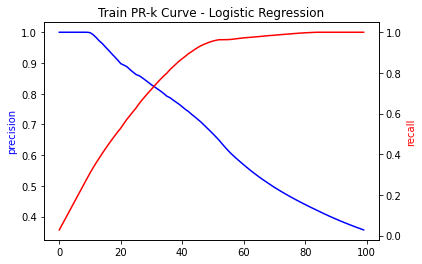

In [ ]:
import matplotlib.pyplot as plt

ax1 = plt.subplot()
plt.plot(range(100), results[:,0], 'b')
plt.ylabel('precision', color='b')

ax2 = ax1.twinx()
plt.plot(range(100), results[:,1], 'r')
plt.ylabel('recall', color='r')
plt.title("Train PR-k Curve - Logistic Regression")
plt.xlabel("Percentage of population selected")
plt.show()

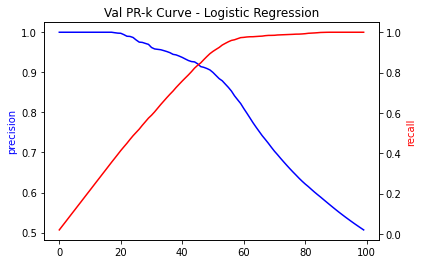

In [ ]:
ax1 = plt.subplot()
plt.plot(range(100), results[:,2], 'b')
plt.ylabel('precision', color='b')

ax2 = ax1.twinx()
plt.plot(range(100), results[:,3], 'r')
plt.ylabel('recall', color='r')
plt.title("Val PR-k Curve - Logistic Regression")
plt.show()

In [ ]:
# train_X.columns[np.argsort(logmodel.feature_importances_)[::-1]]

whole dataset evaluation (precision, recall, tfp)

In [ ]:
whole_split = chron_split_date_ranges(pd.to_datetime(df['date_posted']))

In [ ]:
y_value = []
for s in whole_split:
  #print(s)
  curtrain, curval = generate_train_val(df_final, s)
  curtrain_X = curtrain.drop(columns=['is_fully_funded_after_4_months']).reset_index()
  curtrain_Y = curtrain['is_fully_funded_after_4_months'].values
  curval_X = curval.drop(columns=['is_fully_funded_after_4_months']).reset_index()
  curval_Y = curval['is_fully_funded_after_4_months'].values
  #curtrain_X.dropna(inplace=True)
  #indices_to_keep = ~curtrain_X.isin([np.nan, np.inf, -np.inf]).any(axis=1)
  #curtrain_X[indices_to_keep].astype(np.float64)
  #curtrain_X.dropna(inplace=True)
  curtrain_X[np.isinf(curtrain_X)==True] = 0
  curval_X[np.isinf(curval_X)==True] = 0
  logmodel = LogisticRegression(penalty='none', max_iter=100000000)
  logmodel.fit(curtrain_X[selected], curtrain_Y)
  train_pred = logmodel.predict_proba(curtrain_X[selected])
  val_pred = logmodel.predict_proba(curval_X[selected]) # f(x)
  res = logmodel.predict(curval_X[selected]) # f(x)>0.5
  train_rank = np.argsort(train_pred[:,1])
  val_rank = np.argsort(val_pred[:,1])
  results = []
  threshold = 0.1
  #precision_train = 1 - np.mean(curtrain_Y[train_rank][:int(threshold * len(curtrain_X))])
  precision_val = 1 - np.mean(curval_Y[val_rank][:int(threshold * len(curval_X))])
  #recall_train = np.sum(train_Y[train_rank][:int(threshold * len(train_X))] == False)/np.sum(train_Y==False)
  #recall_val = np.sum(val_Y[val_rank][:int(threshold * len(val_X))] == False)/np.sum(val_Y==False)
  # results.append([precision_train, recall_train, precision_val, recall_val])
  # results = np.array(results)
  print(precision_val)  # 0.683 for l2
  y_value.append(precision_val)

In [ ]:
file1 = open('lr.txt', 'w')
file1.writelines(str(y_value))
file1.close()

## Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier 
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(train_X, train_Y)


In [48]:
train_pred = clf.predict_proba(train_X)[:,1]
val_pred = clf.predict_proba(val_X)[:,1]

In [49]:
train_rank = np.argsort(train_pred)
val_rank = np.argsort(val_pred)

results = []
for threshold in np.linspace(0.01, 1, 100):
    precision_train = 1 - np.mean(train_Y[train_rank][:int(threshold * len(train_X))])
    precision_val = 1 - np.mean(val_Y[val_rank][:int(threshold * len(val_X))])
    recall_train = np.sum(train_Y[train_rank][:int(threshold * len(train_X))] == False)/np.sum(train_Y==False)
    recall_val = np.sum(val_Y[val_rank][:int(threshold * len(val_X))] == False)/np.sum(val_Y==False)
    results.append([precision_train, recall_train, precision_val, recall_val])
results = np.array(results)
print(results[9, 2])

0.6812227074235808


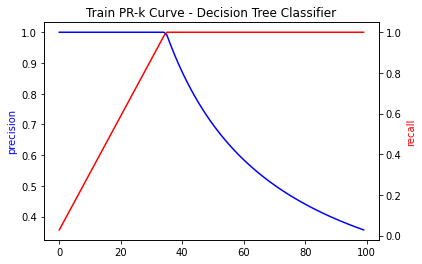

In [50]:
import matplotlib.pyplot as plt
ax1 = plt.subplot()
plt.plot(range(100), results[:,0], 'b')
plt.ylabel('precision', color='b')

ax2 = ax1.twinx()
plt.plot(range(100), results[:,1], 'r')
plt.ylabel('recall', color='r')
plt.title("Train PR-k Curve - Decision Tree Classifier")
plt.xlabel("Percentage of population selected")
plt.show()

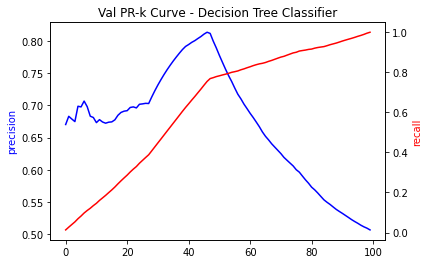

In [51]:
ax1 = plt.subplot()
plt.plot(range(100), results[:,2], 'b')
plt.ylabel('precision', color='b')

ax2 = ax1.twinx()
plt.plot(range(100), results[:,3], 'r')
plt.ylabel('recall', color='r')
plt.title("Val PR-k Curve - Decision Tree Classifier")
plt.show()


In [52]:
whole_split = chron_split_date_ranges(pd.to_datetime(df['date_posted']))

In [53]:
y_value = []
for s in whole_split:
  #print(s)
  curtrain, curval = generate_train_val(df_final, s)
  curtrain_X = curtrain.drop(columns=['is_fully_funded_after_4_months']).reset_index()
  curtrain_Y = curtrain['is_fully_funded_after_4_months'].values
  curval_X = curval.drop(columns=['is_fully_funded_after_4_months']).reset_index()
  curval_Y = curval['is_fully_funded_after_4_months'].values
  #curtrain_X.dropna(inplace=True)
  #indices_to_keep = ~curtrain_X.isin([np.nan, np.inf, -np.inf]).any(axis=1)
  #curtrain_X[indices_to_keep].astype(np.float64)
  #curtrain_X.dropna(inplace=True)
  curtrain_X[np.isinf(curtrain_X)==True] = 0
  curval_X[np.isinf(curval_X)==True] = 0
  clf = DecisionTreeClassifier()

  # Train Decision Tree Classifer
  clf = clf.fit(curtrain_X, curtrain_Y)
  train_pred = clf.predict_proba(curtrain_X)
  val_pred = clf.predict_proba(curval_X) # f(x)
  res = clf.predict(curval_X) # f(x)>0.5
  train_rank = np.argsort(train_pred[:,1])
  val_rank = np.argsort(val_pred[:,1])
  results = []
  threshold = 0.1
  #precision_train = 1 - np.mean(curtrain_Y[train_rank][:int(threshold * len(curtrain_X))])
  precision_val = 1 - np.mean(curval_Y[val_rank][:int(threshold * len(curval_X))])
  #recall_train = np.sum(train_Y[train_rank][:int(threshold * len(train_X))] == False)/np.sum(train_Y==False)
  #recall_val = np.sum(val_Y[val_rank][:int(threshold * len(val_X))] == False)/np.sum(val_Y==False)
  # results.append([precision_train, recall_train, precision_val, recall_val])
  # results = np.array(results)
  print(precision_val)  # 0.683 for l2
  y_value.append(precision_val)

0.33333333333333337
0.15625
0.38888888888888884
0.7435897435897436
0.55
0.6206896551724138
0.5555555555555556
0.625
0.8620689655172413
0.7575757575757576
0.75
0.6190476190476191
0.62
0.6904761904761905
0.5526315789473684
0.5531914893617021
0.7058823529411764
0.7735849056603774
0.7761194029850746
0.7903225806451613
0.7441860465116279
0.7450980392156863
0.7586206896551724
0.7169811320754718
0.8200000000000001
0.9245283018867925
0.8
0.9322033898305084
0.8285714285714285
0.9661016949152542
0.9090909090909091
0.868421052631579
0.9761904761904762
0.926829268292683
0.8717948717948718
0.8695652173913043
0.9538461538461538
0.9383561643835616
0.7889908256880733
0.8085106382978724
0.8144329896907216
0.8725490196078431
0.839622641509434
0.9017857142857143
0.8285714285714285
0.7708333333333334
0.7529411764705882
0.6826923076923077
0.7094017094017093
0.8272727272727273
0.8818181818181818
0.9253731343283582
0.9166666666666666
0.9
0.9210526315789473
0.896
0.8738738738738738
0.8936170212765957
0.808988

# Commonsense baseline over time - children helped per dollar

In [ ]:
split = chron_split_date_ranges(pd.to_datetime(df['date_posted']))
baseline_results = []

for split_ in split:
  train, val = generate_train_val(df_final, split_)
  train_X = train.drop(columns=['is_fully_funded_after_4_months']).reset_index().drop(columns=["index"])
  train_Y = train['is_fully_funded_after_4_months'].values
  val_X = val.drop(columns=['is_fully_funded_after_4_months']).reset_index().drop(columns=["index"])
  val_Y = val['is_fully_funded_after_4_months'].values
  train_select = train_X.sort_values(["children_helped_per_dollar"])
  val_select = val_X.sort_values(["children_helped_per_dollar"])
  train_rank = train_select.index.values
  val_rank = val_select.index.values
  threshold = 0.1
  precision_val = 1 - np.mean(val_Y[val_rank][:int(threshold * len(val_X))])
  baseline_results.append(precision_val)

# Base rate over time

In [ ]:
split = chron_split_date_ranges(pd.to_datetime(df['date_posted']))
base_rate = []

for split_ in split:
  train, val = generate_train_val(df_final, split_)
  train_X = train.drop(columns=['is_fully_funded_after_4_months']).reset_index().drop(columns=["index"])
  train_Y = train['is_fully_funded_after_4_months'].values
  val_X = val.drop(columns=['is_fully_funded_after_4_months']).reset_index().drop(columns=["index"])
  val_Y = val['is_fully_funded_after_4_months'].values
  percentage_not_funded = 1 - val_Y.sum() / len(val_Y)
  base_rate.append(percentage_not_funded)

# Plotting all results over time (logistic regression, nearest neighbor, decision tree, RF, baseline, base rate)